
# Logistic Regression - Case Study II



In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

### import data

In [0]:
#read the data
#df = pd.read_csv('conversion_data.csv')
df = pd.read_csv("/content/conversion_data.csv")

In [5]:
#sneak peek into the data
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
#more details about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [8]:
#target class frequency
df.converted.value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

### Preparing Data For Modeling

In [0]:
#dummy data for categorical variables
df = pd.get_dummies(df, columns=['country','source'])

In [0]:
df.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
 4   country_China        316200 non-null  uint8
 5   country_Germany      316200 non-null  uint8
 6   country_UK           316200 non-null  uint8
 7   country_US           316200 non-null  uint8
 8   source_Ads           316200 non-null  uint8
 9   source_Direct        316200 non-null  uint8
 10  source_Seo           316200 non-null  uint8
dtypes: int64(4), uint8(7)
memory usage: 11.8 MB


In [11]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print (input_columns)
print (output_column)

['age', 'new_user', 'total_pages_visited', 'country_China', 'country_Germany', 'country_UK', 'country_US', 'source_Ads', 'source_Direct', 'source_Seo']
converted


In [12]:
#input data
X = df.loc[:,input_columns].values
#output data 
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(316200, 10) (316200,)


### Modeling : Logistic Regression

In [0]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [28]:
y.value_counts(normalize=True)

0    0.967742
1    0.032258
Name: converted, dtype: float64

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100)

In [25]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.968293
1    0.031707
Name: converted, dtype: float64
0    0.966456
1    0.033544
Name: converted, dtype: float64


In [0]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100, stratify=y)

In [27]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.967742
1    0.032258
Name: converted, dtype: float64
0    0.967742
1    0.032258
Name: converted, dtype: float64


In [16]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(221340, 10)
(221340,)
(94860, 10)
(94860,)


In [17]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


## Train the Logistic Model

In [0]:
#fit the logisitc regression model on training dataset 
logreg = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [30]:
logreg

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.9425574530887624

In [32]:
#score= total correctly predicted values/ total number of obs

ERROR! Session/line number was not unique in database. History logging moved to new session 59


In [33]:
#validate the model performance on unseen data
logreg.score(X_train,y_train)

0.9409821993313454

In [0]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

In [35]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

## Results 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Non Converted", "Converted"]))

               precision    recall  f1-score   support

Non Converted       1.00      0.94      0.97     91800
    Converted       0.35      0.94      0.51      3060

     accuracy                           0.94     94860
    macro avg       0.68      0.94      0.74     94860
 weighted avg       0.98      0.94      0.95     94860



In [37]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.9411002178649238

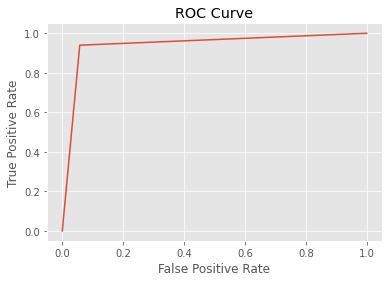

In [38]:
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show() 

# Assignments
1. SVM implementaion for conversion data
2. DT implemetation with different algos
3. Var importance - RF
4. Explaina all types of decision tree splitting mechanism. 
5. Implement all algorithms on fraud dataset.
6. Implement all algorithms on churn dataset as well.